# Week 5

Phew. You've handed in the assignment. But there's not resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, more lecturing on visualization and encodings.
* In part 2, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* In part 3, we get a lightning intro to machine learning and the awesome package sklearn
* And finally, in part 4, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

## Part 1: More lecturing on dataviz

So now we start learning more about the theory of visualization, digging into data encodings and representations.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/zE6Nr8trdrw/0.jpg)](https://www.youtube.com/watch?v=zE6Nr8trdrw)

*Excercise 1:* Some questions about the video

> * Mention 10 examples of ways we can encode data.
<br>-> position, length, area, shape, color, angle, line weight, line ending, texture, pattern
> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
<br>-> no each of them are good to represent different things, so a histogram is perfect to give a rough estimate of the distribution, but there is no way to get the median of the data, so depending on the question and the data, you have to pick a suitable encoding
> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
<br>-> [position (lon, lat) without a map putting it into context]; angle in e.g. a pie chart -> hard to differ when angles are quite similar (better to use a histogram); area/ size; color intensity
<br> https://www.pedestrian.tv/news/newspoll-australian-graph-morrison-albanese/
> * Explain in your own words: What is the problem with pie-charts?
<br>-> easy to fake, hard for the eye to check as we are not used to compare angles, hard to see small differences, even worse in 3D

## Part 2: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. You had to read Chapter 3, which is about visualizing data with two variables, before coming to class today. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You will have to go and get it on DTU Learn due to the copyright stuff**.

And now a few exercises to reflect on the text:

*Exercise 2.1:* Questions from DAOST Chapter 3.

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?

<br> data follows a clear structure -> no outliers visible by eye

> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?

<br> no idea :(

> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?

<br> Loess, Splines
<br> Moving Average Filtering

> * What are residuals? Why is it a good idea to plot the residuals of your fit?

<br> residual = difference in usually y-value of real value and smoothed value -> positive residual real value "above" smoothed value -> negative residual real value "underneath" smoothed value
<br> The presence of a trend or of any other large-scale systematic behavior in the residuals suggests that the model is inappropriate! + plotting the absolute values will show you the goodness of fit + This kind of systematic trend in the residuals
is a clear indicator that the model is not appropriate for the data! + large residuals might help to find outliers

> * Explain in your own words the point of the smooth tube in figure 3-7.

<br> all negative residuals one line + all positive residuals one line = tube -> majority of points will be in between

> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?

<br> We can recognize change (i.e., the slopes of curves) most easily if they make approximately a 45 degree angle on the graph. It is much harder to see change if the curves are nearly horizontal or (even worse) nearly vertical. The idea behind banking is therefore to adjust the aspect ratio of the entire plot in such a way that most slopes are at an approximate 45 degree angle. [The purpose of banking is to improve human perception of the graph (it is, after all, exactly the same data that is displayed).]
<br> e.g. the figure has become so small that it is hard to recognize much detail

> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

<br> Graphical analysis
<br> Graphical analysis is an investigation of data using graphical methods. The purpose is
the discovery of new information about the underlying data set. In graphical analysis,
the proper question to ask is often not known at the outset but is discovered as part of
the analysis. -> graph whatever you want how often you want -> “looking at the data from all angles.” -> don't focus on making the data look clean, but understanding it
<br>
<br> Presentation graphics
<br> Presentation graphics are concerned with the communication of information and results that are already understood. The discovery has been made, and now it needs to be communicated clearly -> add text to explain your findings etc./  make results easy to be understood by everyone

**Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).**

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover? 

<br> all relative changes have the same size no matter how large the corresponding absolute change -> relative change is what matters.

>    * What kind of functions will loglog plots help you see?

<br> Monomials – relationships of the form {\displaystyle y=ax^{k}}y=ax^k – appear as straight lines in a log–log graph, with the power term corresponding to the slope, and the constant term corresponding to the intercept of the line.

> * Second, we are going to create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. 
> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. 
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. We've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

In [85]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
from sklearn.linear_model import LinearRegression

In [18]:
# read police incidence reports, historical 2003 to may 2018
police_incidence_reports = pd.read_csv(Path.cwd().parent/"files"/"Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

# preprocessing -> combining the date and time column to a datetime column + sorting the data
police_incidence_reports['Datetime'] = pd.to_datetime(police_incidence_reports['Date']+ ' ' +\
    police_incidence_reports['Time'], format="%m/%d/%Y %H:%M")
police_incidence_reports = police_incidence_reports.sort_values(['Category', 'Datetime']).reset_index()

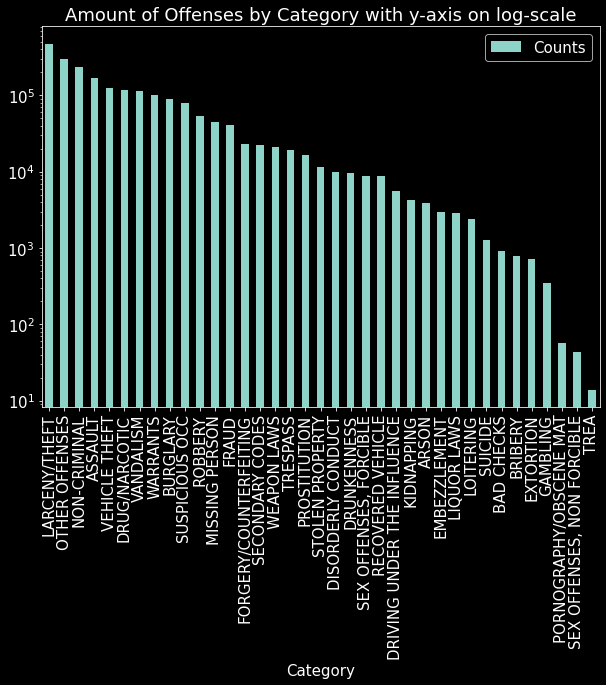

In [19]:
# Exercise 2.2.2
police_incidence_reports_category = police_incidence_reports.groupby(['Category']).agg({'PdId':'count'}).\
    rename(columns={'PdId':'Counts'}).sort_values(by=['Counts'], ascending = False).reset_index()

ax = police_incidence_reports_category.plot(kind = 'bar', x='Category', logy = True, figsize=(10,7), \
                                            title = 'Amount of Offenses by Category with y-axis on log-scale')
plt.rcParams.update({'font.size': 15})
plt.show()

del police_incidence_reports_category, ax

In [20]:
# Exercise 2.2.3

# based on scripts in Week5_binning.ipynb

# remove geographical outliers
police_incidence_reports_without_geographical_outliers = police_incidence_reports[(police_incidence_reports.Y < 50) \
    & (police_incidence_reports.X<-122)]

# helperfunction
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

# calculating the borders of San Francisco

lat_min = police_incidence_reports_without_geographical_outliers.Y.min()
lat_max = police_incidence_reports_without_geographical_outliers.Y.max()
lon_min = police_incidence_reports_without_geographical_outliers.X.min()
lon_max = police_incidence_reports_without_geographical_outliers.X.max()

print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)*10}") 
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)*10}")
# -> grid size 130 x 125 bins

counts_offenses_in_bins, lon, lat = np.histogram2d(police_incidence_reports_without_geographical_outliers.Y, \
    police_incidence_reports_without_geographical_outliers.X, bins = [130,125])

del lat, lat_max, lat_min, lon, lon_max, lon_min

Estimated bin amount along the western border of San Fransisco: 125.36317921721148
Estimated bin amount along the eastern border of San Fransisco: 125.36317921721148
Estimated bin amount along the northern border of San Fransisco: 130.78123566673807
Estimated bin amount along the southern border of San Fransisco: 130.9807444161078


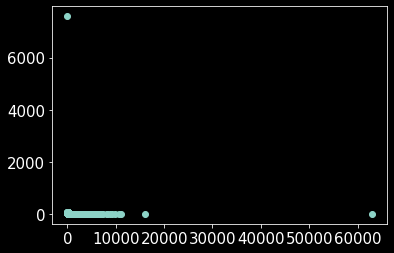

In [21]:
# Exercise 2.2.3

geographical_bins_with_same_value_counted = pd.DataFrame(np.transpose(np.unique(counts_offenses_in_bins, return_counts=True)))\
    .rename(columns={0:'k', 1:'N(k)'})

# to plot k+1 vs. N(k) -> don't understand why, but asked in the question
geographical_bins_with_same_value_counted['k+1'] = geographical_bins_with_same_value_counted['k'] + 1

# linear
fig = plt.figure()
ax = plt.gca()
ax.scatter(geographical_bins_with_same_value_counted['k+1'].values, geographical_bins_with_same_value_counted['N(k)'].values)



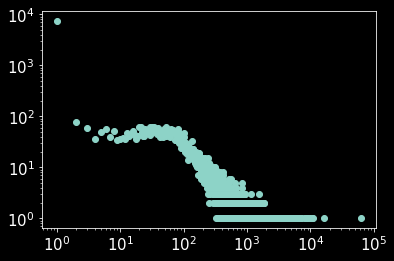

In [22]:
# log log
fig = plt.figure()
ax = plt.gca()
ax.scatter(geographical_bins_with_same_value_counted['k+1'].values, geographical_bins_with_same_value_counted['N(k)'].values)
ax.set_yscale('log')
ax.set_xscale('log')

**Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?**

<br> kinda

## Part 3: Lightning intro to Machine Learning and sklearn

Before we get to linear regression and as we are going to use a bit of Machine Learning in the following lectures too, we are going to have a quick intro to Machine Learning.

We kick off the machine-learning part by watching a video lecture on *What Machine Learning is*. The lecture (and the one in next weeks) have been prepared by our very own expert, Ole Winter, whose work focuses on Machine Learning. The lectures + slides have been prepared especially for you guys by Ole, and lovingly edited by Sune.

**What is machine learning?**
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/SsCYF9tDY9Y/0.jpg)](https://www.youtube.com/watch?v=SsCYF9tDY9Y)

*Exercise 3.1* We now tie everything together (video, DAOST etc.) by answering a few questions:
> * What are the different categories of Machine Learning? Where does linear regression fall in?

<br> supervised learning
<br> unsupervised learning
<br> semi-supervised learning
<br> reinforcement learning
<br> linear regression -> supervised learning

> * What is the difference between Machine Learning and Statistics? How does this idea connect to the purpose of linear regression according to Janert (DAOST Ch. 3)?

<br> "At the end of the day, the difference between statistics and machine learning is that machine learning involves the convergence of a variety of techniques and technologies that can include statistics and statistical modelling, while statistics focuses on using data to make predictions and create models for analysis." 
<br> https://onlinestats.canr.udel.edu/machine-learning-vs-statistics/#:~:text=When%20it%20comes%20down%20to,predictions%20and%20create%20models%20for

[Difference Machine Learning Statistics](https://github.com/Philipp-Otter/socialdata2022/blob/main/files/Difference_ml_statistics.png)

[Difference Machine Learning Statistics 2]("https://github.com/Philipp-Otter/socialdata2022/blob/main/files/Difference_ml_statistics_2.png")

<br> DAOST: "This is an important understanding: the purpose of a regression procedure is not to summarize the data—the purpose is to obtain a function that allows us to predict the value of the response variable (which is affected by noise) that we expect for a certain value of the input variable (which is assumed to be known exactly)."

> * I think figure 3-14 (DAOST Ch. 3) makes an important point about linear fits that is rarely made. What is it? 

<br> you usually always plot y = a+ bx and not even consider x = c + dy? 

> * What is problematic about using straight lines to fit the data in Fig 3-5? (Something similar is actually the topic of a *Nature* article from 2004 get it [here](https://github.com/suneman/socialdata2022/blob/main/files/regrunners.pdf). And an extra [link](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3366/pdf/imm3366.pdf) on this topic for the students who know Danish).

<br> The data is cannot be represented as a straight line as it stagnates at some point. This means, also when your current measurements can be represented as a line, this does not automatically mean that this behavior stays the same in the future. Regression just predicts stuff, but it is your responsibility to value the results and interpret them based on further research.

**Ok, but how do we apply different machine learning models in practice?**

The amazing package `sklearn` is state-of-the-art machine learning for Python. It's used in companies big and small all over the world and in lots of academic papers.

Today, we start with a high level overview presented in [this tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html). **Try it out**: Read/work through the first three sections (*Machine learning: the problem setting*, *Loading an example dataset*, *Learning and predicting*) to get a sense of data types and syntax.

*Exercise 3.2*: Did you read the text?
>
> * Describe in your own words how data is organized in `sklearn` (how does a *dataset* work according to the tutorial)?

<br> in an array -> rows = samples, columns = features

> * What is the dimensionality of the `.data` part of a dataset and what is the size of each dimension?

<br> in an array -> rows = samples, columns = features 

<br> same answer for both questions??



## Part 4: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [23]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 14 focus crimes that results in 91 pairwise comparisons. 

*Exercise 4.1*: Create the 91 scatterplots.
> * Display the plots in a $7$ by $13$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

In [24]:
# preparing data
focuscrimes = pd.DataFrame(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', \
    'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes.columns = ['Category']
focuscrimes = pd.merge(focuscrimes, police_incidence_reports, on = 'Category')

focuscrimes['Hours_of_the_week'] = focuscrimes['Datetime'].dt.dayofweek * 24 + (focuscrimes['Datetime'].dt.hour + 1)

focuscrimes_by_category_hours_of_the_week = focuscrimes.groupby(['Category', 'Hours_of_the_week']).agg({'PdId':'count'})\
    .sort_values(by=['Category', 'Hours_of_the_week']).rename(columns={'PdId':'Counts'}).reset_index()

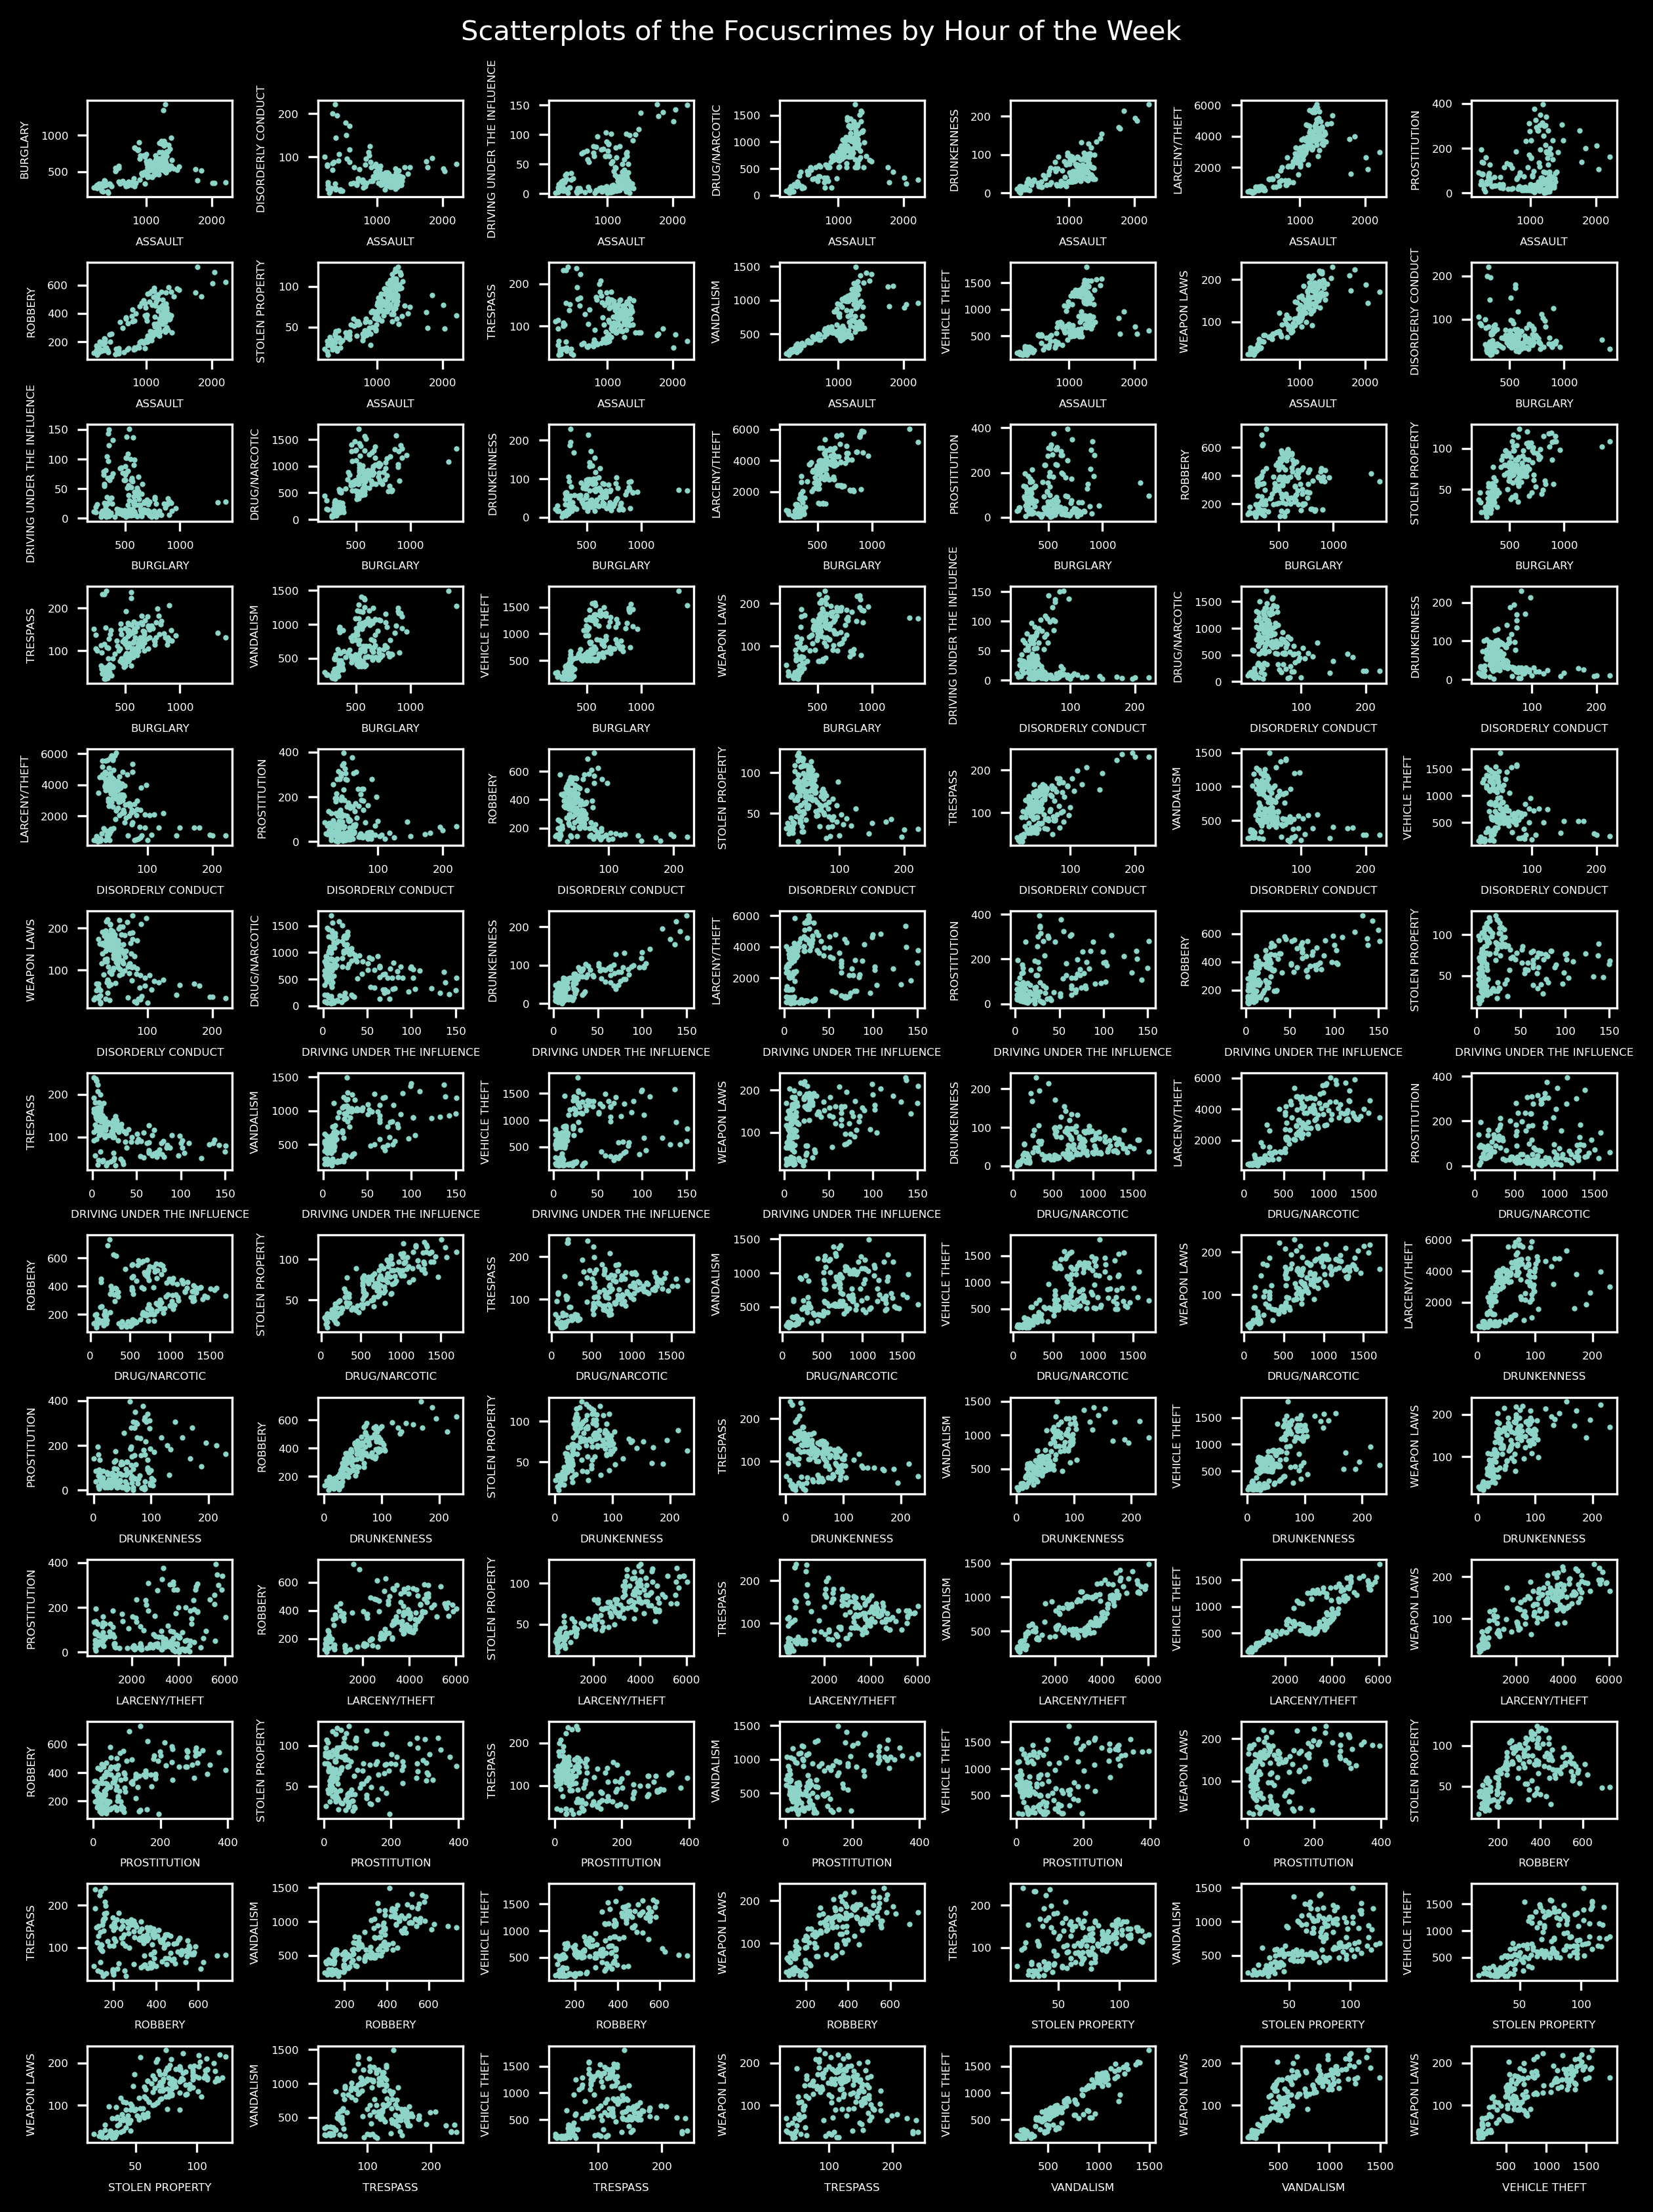

In [84]:
# plotting

fig = plt.figure(dpi=300)
fig.set_size_inches(8.27, 11.69, forward=True)

crimetype_plotted = []
counter = 0

for crimetype_x in sorted(focuscrimes_by_category_hours_of_the_week['Category'].unique()):

    crimetype_plotted.append(crimetype_x)

    for crimetype_y in sorted(focuscrimes_by_category_hours_of_the_week[~focuscrimes_by_category_hours_of_the_week['Category']\
        .isin(crimetype_plotted)]['Category'].unique()):
    
        ax = fig.add_subplot(13, 7,counter+1)
        ax.scatter(focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]\
                        ['Counts'],\
                   focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_y])]\
                       ['Counts'], s = 1)
        ax.set_xlabel(crimetype_x)
        ax.set_ylabel(crimetype_y)

        counter = counter + 1 

plt.rcParams.update({'font.size': 4})
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Scatterplots of the Focuscrimes by Hour of the Week', fontsize = 10)
plt.show()

<br> which correlated? e.g. vandalism and vehicle theft
<br> 
<br> which very different? e.g. vandalism and drug/ narcotic

---

**Next it's time for the linear regression. Janert writes about this on page 63-66.**

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, Sune actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise 4.2:* Linear regression using sklearn.
>
> * Using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from `sklearn`, compute the slope and intercept for each couple of focus-crimes (from Ex. 4.1) and add a linear fit to each of the 91 scatterplots above.
> * **(Optional but highly recommended)** Using the formulas we derived above (Equation 1 and 2), calculate the slopes for $a$ and $b$ in each case. Compare the results with the ones obtained with sklearn to check that everything is working as expected.
> * **(Optional)** You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue).

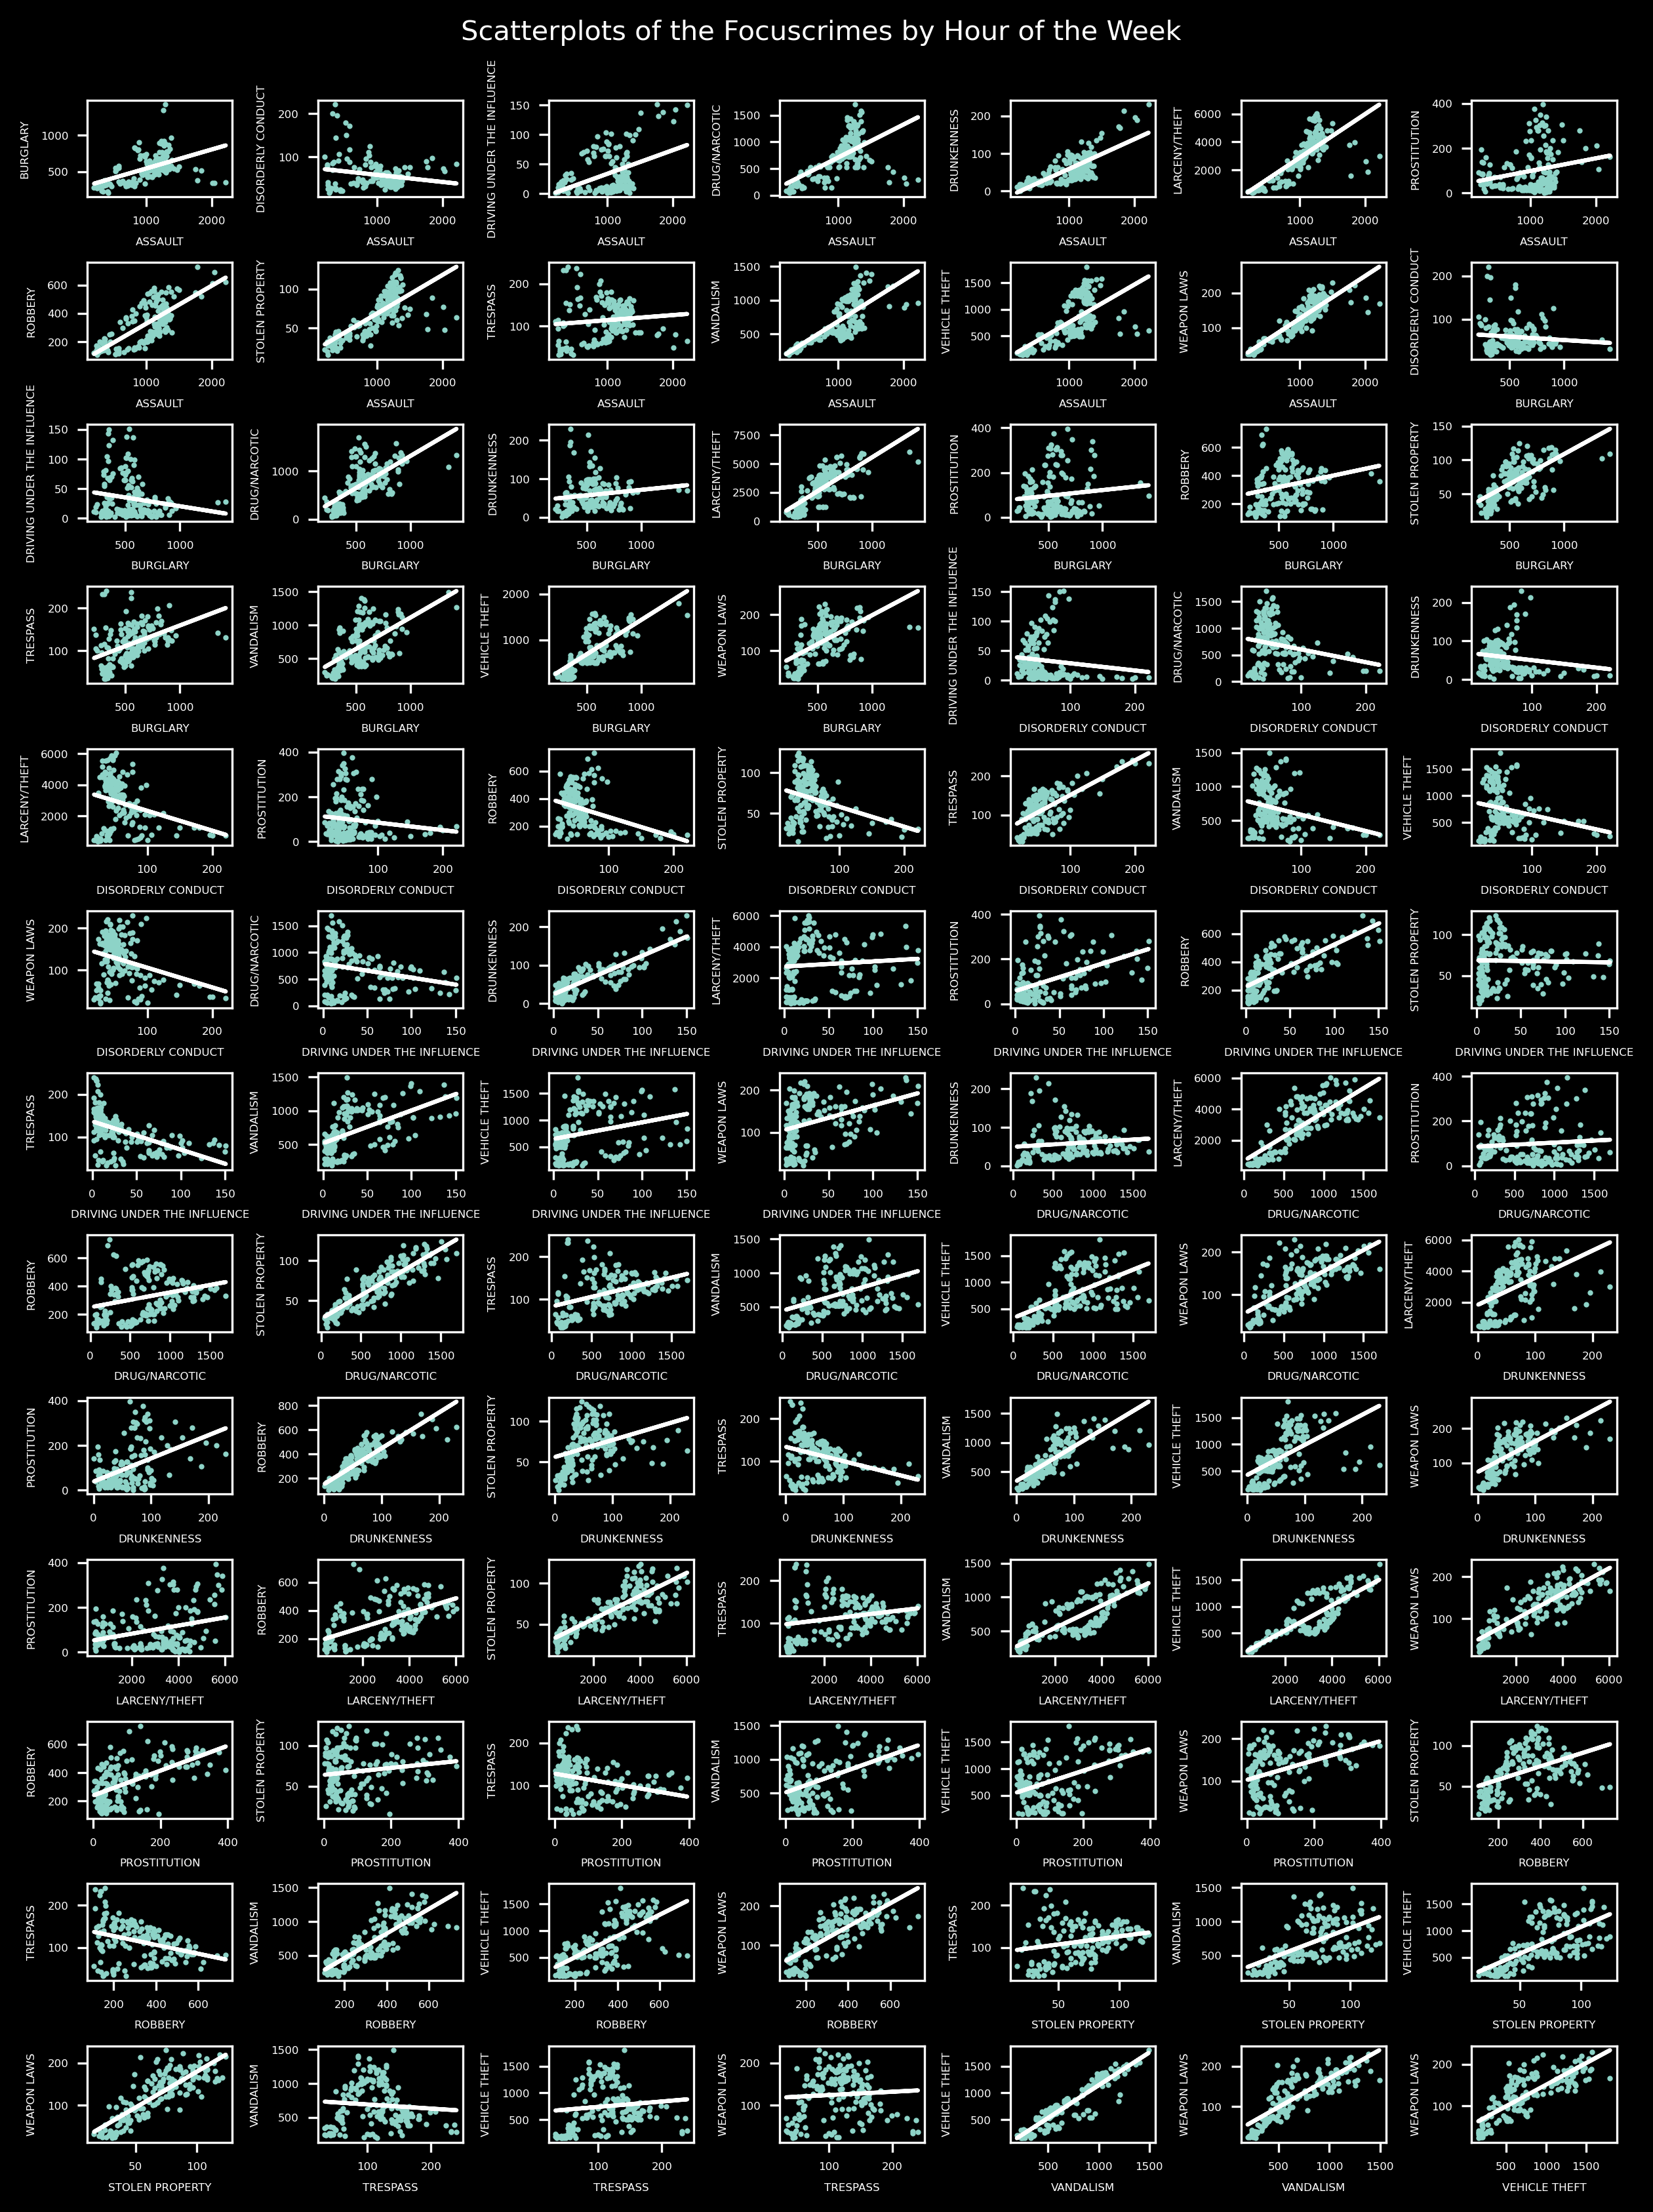

In [88]:
# plotting

fig = plt.figure(dpi=300)
fig.set_size_inches(8.27, 11.69, forward=True)

crimetype_plotted = []
counter = 0

for crimetype_x in sorted(focuscrimes_by_category_hours_of_the_week['Category'].unique()):

    crimetype_plotted.append(crimetype_x)

    for crimetype_y in sorted(focuscrimes_by_category_hours_of_the_week[~focuscrimes_by_category_hours_of_the_week['Category']\
        .isin(crimetype_plotted)]['Category'].unique()):

        model = LinearRegression()
        model.fit(focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]\
                        ['Counts'].values[:,np.newaxis],\
                   focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_y])]\
                       ['Counts'].values)
    
        ax = fig.add_subplot(13, 7,counter+1)
        ax.scatter(focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]\
                        ['Counts'],\
                   focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_y])]\
                       ['Counts'], s = 1)
        ax.plot(focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]\
                    ['Counts'].values[:,np.newaxis], 
                model.predict(focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]\
                    ['Counts'].values[:,np.newaxis]), color='w')
        ax.set_xlabel(crimetype_x)
        ax.set_ylabel(crimetype_y)

        counter = counter + 1 

plt.rcParams.update({'font.size': 4})
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Scatterplots of the Focuscrimes by Hour of the Week', fontsize = 10)
plt.show()

In [216]:
# 4.2 optional, but highly recommended
# Cov(X, Y) / Var(X)

x = focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]['Counts']
y = focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_y])]['Counts']

a = np.cov(x,y)[0][1]/np.var(x) #slope
b = np.mean(y)-a*np.mean(x) #intercept

model = LinearRegression()
model.fit(x.values[:,np.newaxis],y.values)

a_model = model.coef_ #slope
b_model = model.intercept_ #intercept

# -> a similar, but b different -> needs further investigation

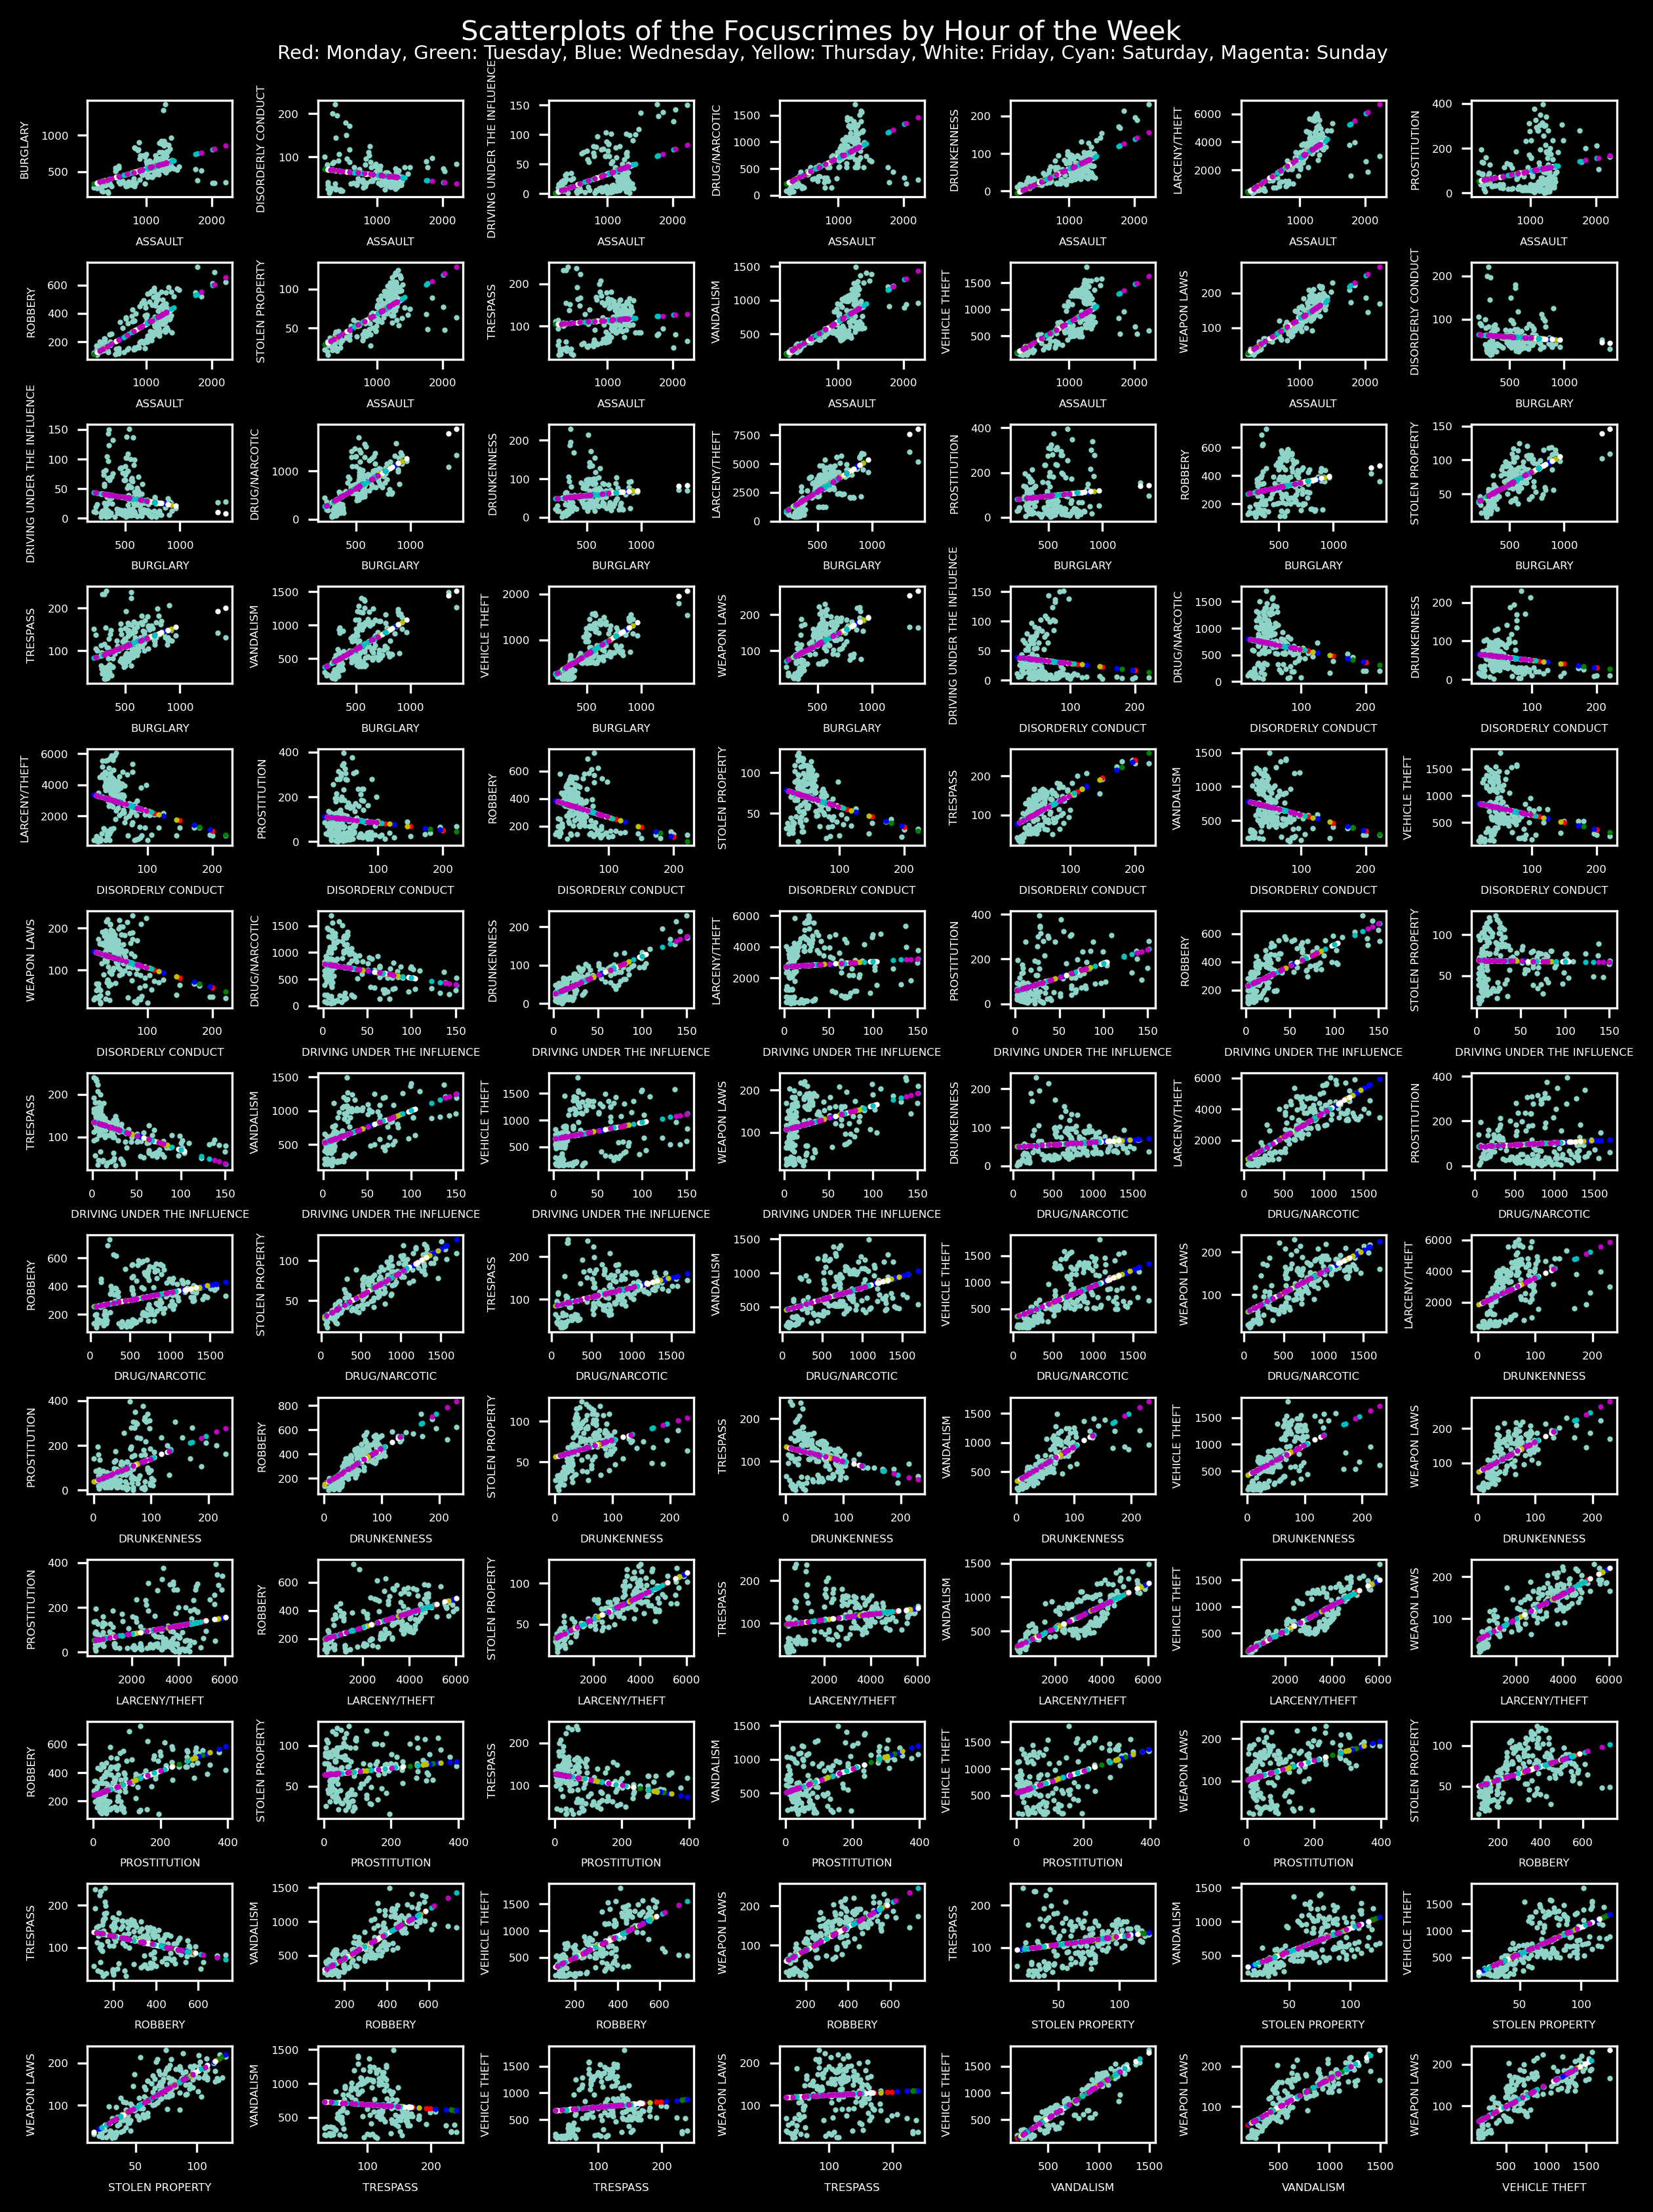

In [209]:
# 4.2 plotting optional 2

fig = plt.figure(dpi=300)
fig.set_size_inches(8.27, 11.69, forward=True)

crimetype_plotted = []
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm']
counter = 0

for crimetype_x in sorted(focuscrimes_by_category_hours_of_the_week['Category'].unique()):

    crimetype_plotted.append(crimetype_x)

    for crimetype_y in sorted(focuscrimes_by_category_hours_of_the_week[~focuscrimes_by_category_hours_of_the_week['Category']\
        .isin(crimetype_plotted)]['Category'].unique()):

        model = LinearRegression()
        model.fit(focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]\
                        ['Counts'].values[:,np.newaxis],\
                   focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_y])]\
                       ['Counts'].values)
    
        ax = fig.add_subplot(13, 7,counter+1)
        ax.scatter(focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]\
                        ['Counts'],\
                   focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_y])]\
                       ['Counts'], s = 1)
        
        counter_2 = 0

        for i in range(0, 167, 24):        
        
                ax.scatter(focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]\
                           ['Counts'].values[:,np.newaxis][i:i+23], 
                           model.predict(focuscrimes_by_category_hours_of_the_week[focuscrimes_by_category_hours_of_the_week['Category'].isin([crimetype_x])]\
                           ['Counts'].values[:,np.newaxis][i:i+23]),
                           color=colors[counter_2], s=1)
                counter_2 = counter_2 + 1

        ax.set_xlabel(crimetype_x)
        ax.set_ylabel(crimetype_y)

        counter = counter + 1 

plt.rcParams.update({'font.size': 4})
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Scatterplots of the Focuscrimes by Hour of the Week', fontsize = 10)

plt.text(x=-14900, y=5025, s='Red: Monday, Green: Tuesday, Blue: Wednesday, Yellow: Thursday, White: Friday, Cyan: Saturday, Magenta: Sunday'\
        , fontsize=7)


#fig.suptitle('Test', fontsize = 5)
#['r', 'g', 'b', 'y', 'w', 'c', 'm']

plt.show()

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise 4.3:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit, and compare it with the one provided by the function `score()` in `sklearn`.
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).